# Homework 5: 2D Arrays and Agent-based Modeling (EXTRA CREDIT)

### <p style="text-align: right;"> &#9989; Cesarine Graham.


# __CMSE  201 &ndash; Fall 2022__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
## Learning Goals

In this homework, you will:

* Access and manipulate 2D arrays
* Implement and explore an Agent-based model

## Practice goals

* Using functions to optimize code development
* Debugging complex code

## Part 1: Creating a Blurry Filter with 2D Arrays

**AHHHHH!!** Run the cell below to see a recreation of "The Scream," a famous painting by Edvard Munch. As it turns out, you can use what you've learned about 2D arrays to apply a blurring filter to the image. Let's do it.

(-0.5, 749.5, 999.5, -0.5)

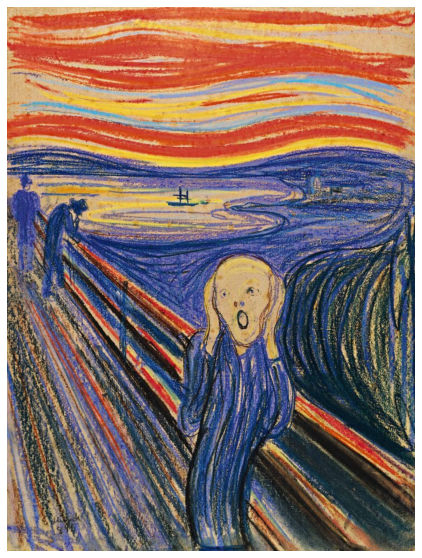

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

picture = Image.open("scream.jpg")
plt.figure(figsize = (10,10))
plt.imshow(picture)
plt.axis('off')

Check out the code for the blurring filter below. The outer for-loop allows for multiple iterations of "blurring," which you can change using the `iterations` variable. For now, leave it at 1.

The way the blurring works is, the RGB values of a "blurred" pixel should be equal to the average RGB values of the "unblurred" pixel and its neighbors from the original image. See the visual below for a demonstration of this process.

![](blurred-math.png)

### (a) (10 points)

&#9989;&nbsp; At each line with a single hashtag `#`, add a comment explaining what the below line(s) of code are doing. At each line with a double hashtag `##`, fill in the blanks so that the filter will run properly.

In [3]:
current_pic = picture
### the number of times the image will be "blurred" -- the more iterations, the blurrier
iterations = 1

img_shape = picture.shape
zeros_array = np.zeros(img_shape)

# comment here
for x in range(iterations):
    # running the loop through the pixels
    current_array = np.asarray(current_pic)
    
    # comment here
    blurred_reds = zeros_array(current_array)
    blurred_greens = zeros_array(current_array)
    blurred_blues = zeros_array(current_array)

    # comment here
    for i in range(current_array.shape[0]): ## fill in the blank
        # comment here
        for j in range(current_array.shape[1]): ## fill in the blank
            # comment here
            red_avg, green_avg, blue_avg = nearby_averages(i, j, current_array)
            
            # comment here
            blurred_reds[i, j] = red_avg[:,:,0] ## fill in the blank
            blurred_greens[i, j] = green_avg[:,:,1] ## fill in the blank
            blurred_blues[i, j] = blue_avg[:,:,2] ## fill in the blank
    
    # comment here
    current_pic = np.dstack((blurred_reds, blurred_greens, blurred_blues)).astype(np.uint8)

# comment here
plt.figure(figsize = (10,10))
plt.imshow(current_pic)
plt.axis('off')

AttributeError: shape

### (b) (10 points)

Two functions are undefined -- `zeros_array` and `nearby_averages`. `zeros_array` is supposed to return blank 2D array of zeros with the same shape as the input. `nearby_averages` is supposed to return the average red, green, and blue values of the specified pixel and its neighbors. You can infer the specific input and output format by seeing how the functions are called in the code above.

&#9989;&nbsp; Write the functions `zeros_array` and `nearby_averages` to make the above code work properly.

You can use the given functions below for free.

In [ ]:
# do not edit the code in this cell

def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

def getNeighborValues(i,j, board):
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

In [ ]:
# your answer here

### (c) (5 points)

&#9989;&nbsp; Copy and paste the working code chunk from Part (a), and run the blurring process with 10 iterations. It might take a couple of **minutes**. In the end, you should get an image that looks a bit like the blurred painting below.

![](blurred-scream.png)

In [ ]:
# your answer here

## Part 2: Agent-based Modeling: Exploring the Forest Fire Model (controlled burns and forest regrowth)

In this part, we will begin with the code from Forest Fire Day 2 (Day 22 In Class) to learn a bit more about forest fires. The cells below hold that functioning code and one run of the model.

We are going to explore the idea of controlled (or prescribed) burns for forest management. Read [this (short) article](https://www.vox.com/science-and-health/2022/6/15/23169428/wildfire-season-controlled-burn-climate) about the origin of prescribed burns and how they are used. Then, begin to work through the coding questions below.

In [ ]:
## Import packages
# standard includes
import numpy as np
import numpy.random as rand
%matplotlib inline
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

### Functions for the model (`plotgrid`,`set_board`,`OnBoard`,`getNeighborValues`,`advance_board`,`calc_stats`)

You don't need to do anything here except run this cell.

In [ ]:
#############RUN THIS CELL ###################
def plotgrid(myarray):
    
    # First create two vectors based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0])
    
    # Use the numpy meshgrid function to create two matrices
    # of the same size as myarray with x and y indexes
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # Make a list of all the x and y indexes that are either trees or fire.
    tree_x = x_indices[myarray == 1];   
    tree_y = y_indices[myarray == 1]; 
    fire_x = x_indices[myarray == 2];   
    fire_y = y_indices[myarray == 2]; 
    
    # Plot the trees and fire.
    plt.plot(tree_x, myarray.shape[0] - tree_y - 1, 'gs',markersize=10)   
    plt.plot(fire_x, myarray.shape[0] - fire_y - 1, 'rs',markersize=10)  
    
    # Set the x and y limits so we don't cut off the shapes
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # Removing tick marks
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
def set_board(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_trees_start:
                game_board[i,j] = 1

    # set the whole left edge of the board on fire. We're arsonists!
    game_board[:,0] = 2
    
    return game_board

def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

def getNeighborValues(i,j, board):
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    
    # create a new array that's just like the original one, but initially 
    # set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
    
            # if the cell was empty last turn, it's still empty.
            # if it was on fire last turn, it's now empty.
            if game_board[i,j] == 0 or game_board[i,j] == 2:
                new_board[i,j] = 0
    
            # now, if it's a tree we have to decide what to do.
            if game_board[i,j] == 1:
                
                # initially make it a tree
                new_board[i,j] = 1
                
                # If one of the neighboring cells was on fire last turn, 
                # this cell is now on fire!
                if 2 in getNeighborValues(i,j,game_board):
                    new_board[i,j] = 2

    # return the new board
    return new_board
def calc_stats(game_board):
    '''
    Calculates the fraction of cells on the game board that are 
    a tree or are empty.
    
    Input: a game board
    
    Output: fraction that's empty, fraction that's covered in trees.
    '''
    
    # use numpy to count up the fraction that are empty
    frac_empty = (game_board == 0).sum() / game_board.size

    # do the same for trees
    frac_tree = (game_board == 1).sum() / game_board.size
    
    # return it!
    return frac_empty, frac_tree

### Run the Model

You don't need to do anything here except run the cell and make sure everything works.

In [ ]:
# 
f_trees_start=0.6
board_size = 50

#
fig = plt.figure(figsize=(10,10))

# 
game_board = set_board(board_size=board_size, f_trees_start=f_trees_start)

# 
plotgrid(game_board)

# 
on_fire = True

# 
while on_fire == True:

    # 
    game_board = advance_board(game_board)
    
    # 
    plotgrid(game_board)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    fig.clear()

    # 
    frac_empty, frac_trees = calc_stats(game_board)

    # 
    if frac_empty + frac_trees == 1.0:
        on_fire = False

# 
plt.close()

### **Question 1 (5 points):** Rewrite `set_board` so it  only sets on fire one random cell

Below, is a copy of the `set_board` function. You need to edit the code (in the indicated place) so that the board only sets one random cell on fire instead of the whole first line. To get a random position in x and y, use numpy `rand.randint()` (instead of `rand.random()`). Demonstrate that your code works by using `plotgrid` to plot your `set_board` result.

In [ ]:
def set_board(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_trees_start:
                game_board[i,j] = 1

    # set one random cell to be on fire!
    game_board[?,?] = 2
    
    return game_board

## Question 2 (5 points): Edit the `regrowth` function

In the cell below, there is a function defined as `regrowth` that resets random empty cells in the forest to trees by applying what amounts to a chance (or probability) that a tree "grows" there (and repeats this process for every location in the forest for a number of years). You are given some code and pseudocode, and your task is to make sure the function takes in the result of a simulation (i.e. the 2D array `game_board` once the fire burns out) as well as the number of years you want the forest to "grow" for. Demonstrate that your function works by plotting your original board and then calling the regrowth function and plotting that board. 
**NOTE:** Take care with bugs in your code!! If your code is behaving oddly, try **restarting your Kernel** and running your cells in order. If you aren't careful with variable naming, you may not be editing the board the way you think you are.

In [ ]:
# EDIT ME!
def regrowth(game_board,years,fire_flag = True):
    q=0
    while # Fill in the condition to iterate to a number of years!:
        for i in range(game_board.shape[0]):
            for j in range(game_board.shape[1]):
                # if the cell on the board is empty, there's a chance a new tree will spawn
                if game_board[i,j] == 0:
                        if rand.random() <= 0.01:
                            game_board[i,j] = 1
                        else:
                            game_board[i,j] = 0

                # if it's a tree, it stays a tree.
                if game_board[i,j] == 1:
                    # Edit me!!
        q+=1
        if fire_flag == True:
            # set one random cell to be on fire!

    
    return game_board

### Question 3 (7 points): How any years (i.e. iterations of regrowth) does it take for the forest to return to its original tree fraction?

Using the various functions, write code that uses the `regrowth` function for as many years as it takes for the forest/game_board to return to the original `f_trees_start` of 0.6.

For full credit, try multiple different starting boards from the original model to learn more about how consistent your result for number of years is.

In [ ]:
# put your code here

### Question 4 (8 points): Independent Research

For this assignment, we gave gave you a "rate" of regrowth to use. Do some internet research (and cite your sources) to learn more about prescribed burns and determine how many years it typically takes a forest to recover after a prescribed/controlled burn. 

Then, try some different rates in your `regrowth` function to see what effect rate has on your conclusions from Question 3. What do you observe?

For full credit on this problem, you must write 3-5 sentences summarizing the results of your interenet research to justify your answer for the number of years it takes a forest to recover **as well as** writing some code to explore the different rates.

<font size=6 color="#009600">&#9998;</font> *Put your text here*

In [ ]:
# put any code here

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59 p.m. on Friday, Dec 9.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #5.  Submission instructions can be found at the end of the notebook.